### Import Data

In [1]:
import numpy as np
import pandas as pd

from sklearn import tree

import graphviz


## Read Data

In [2]:
data = pd.read_csv('trade_data.csv')
data

,Unnamed: 0,datetime,order_type,close1_ema33,rsi14,sto533,pos_bb20,sd_pos,profit_in_points,target
0,1,2016.01.04 10:30:00,1,-0.000286,50.4606,89.9421,0.750038,-0.627089,-143,0
1,2,2016.01.04 21:00:00,0,-0.003812,36.1899,13.2363,-2.310600,0.081607,242,1
2,3,2016.01.05 13:30:00,1,-0.000373,49.3773,78.2101,0.797477,-0.829733,-242,0
3,4,2016.01.05 14:30:00,0,-0.002584,33.9050,28.9969,-2.963800,-0.557520,547,1
4,5,2016.01.06 05:30:00,1,-0.000988,46.9436,70.5545,1.127080,-1.485210,-73,0
...,...,...,...,...,...,...,...,...,...,...
395,396,2016.07.11 12:30:00,0,-0.000494,46.4203,16.9096,-0.578216,-0.846135,-99,0
396,397,2016.07.11 18:30:00,1,0.001156,58.4839,88.1785,1.300440,1.569910,334,1
397,398,2016.07.12 21:30:00,0,0.000225,49.6937,36.4691,-0.661009,-0.912117,195,1
398,399,2016.07.13 13:00:00,1,0.000079,51.9744,69.8370,2.279320,-1.330220,-111,0


In [3]:
# x = data[["close1_ema33", "rsi14", "sto533", "pos_bb20", "sd_pos"]]
x = data.iloc[:, 3:-2]
x

,close1_ema33,rsi14,sto533,pos_bb20,sd_pos
0,-0.000286,50.4606,89.9421,0.750038,-0.627089
1,-0.003812,36.1899,13.2363,-2.310600,0.081607
2,-0.000373,49.3773,78.2101,0.797477,-0.829733
3,-0.002584,33.9050,28.9969,-2.963800,-0.557520
4,-0.000988,46.9436,70.5545,1.127080,-1.485210
...,...,...,...,...,...
395,-0.000494,46.4203,16.9096,-0.578216,-0.846135
396,0.001156,58.4839,88.1785,1.300440,1.569910
397,0.000225,49.6937,36.4691,-0.661009,-0.912117
398,0.000079,51.9744,69.8370,2.279320,-1.330220


In [4]:
# y = data[["target"]]
y = data.iloc[:, -1:]
y

,target
0,0
1,1
2,0
3,1
4,0
...,...
395,0
396,1
397,1
398,0


## Data train -> 80% and test -> 20%

In [5]:
start_test_position = int(len(data) * 80 / 100 )
start_test_position

320

In [6]:
x_train = x.iloc[:start_test_position]
x_train

,close1_ema33,rsi14,sto533,pos_bb20,sd_pos
0,-0.000286,50.4606,89.94210,0.750038,-0.627089
1,-0.003812,36.1899,13.23630,-2.310600,0.081607
2,-0.000373,49.3773,78.21010,0.797477,-0.829733
3,-0.002584,33.9050,28.99690,-2.963800,-0.557520
4,-0.000988,46.9436,70.55450,1.127080,-1.485210
...,...,...,...,...,...
315,-0.001619,40.2336,24.20330,-1.035180,1.761070
316,0.002227,67.4630,74.89990,3.468160,0.341190
317,-0.000304,45.1515,7.91246,-1.756840,-1.970780
318,-0.000329,48.3629,88.78790,1.523360,-0.897524


In [7]:
x_test = x.iloc[start_test_position:]
x_test

,close1_ema33,rsi14,sto533,pos_bb20,sd_pos
320,0.012689,88.6868,90.6858,4.278100,4.293000
321,0.001980,60.0967,63.3562,-0.912394,-0.587287
322,0.003186,69.2156,62.9310,1.522120,-0.674067
323,0.000136,46.6008,12.1795,-1.673270,-0.863508
324,0.002031,60.1426,62.5935,1.570180,-0.355062
...,...,...,...,...,...
395,-0.000494,46.4203,16.9096,-0.578216,-0.846135
396,0.001156,58.4839,88.1785,1.300440,1.569910
397,0.000225,49.6937,36.4691,-0.661009,-0.912117
398,0.000079,51.9744,69.8370,2.279320,-1.330220


In [8]:
y_train = y.iloc[:start_test_position]
y_train

,target
0,0
1,1
2,0
3,1
4,0
...,...
315,0
316,1
317,1
318,0


In [9]:
y_test = y.iloc[start_test_position:]
y_test

,target
320,1
321,0
322,0
323,0
324,0
...,...
395,0
396,1
397,1
398,0


## Create model

In [18]:
clf = tree.DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=70)
clf = clf.fit(x_train, y_train)

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=("close1_ema33", "rsi14", "sto533", "pos_bb20", "sd_pos"),
                                filled=True,
                                rounded=True,
                                special_characters=True)

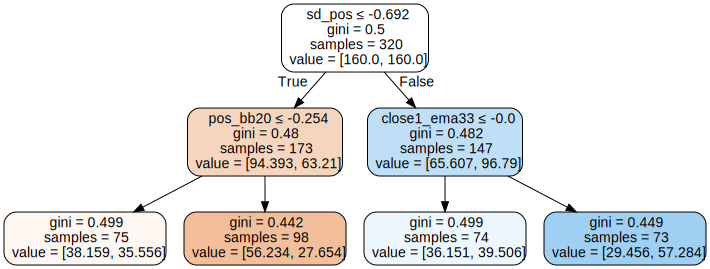

In [19]:
graph = graphviz.Source(dot_data)
graph

## Making Prediction

In [20]:
y_predict = clf.predict(x_test)
y_predict

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [12]:
y_test_arr = y_test.values.ravel()
y_test_arr

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0])

## Model Evaluation

#### Accuracy

In [21]:
acc = clf.score(x_test, y_test)
acc

0.6375